In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\test\Anomaly_bank_transactions_data_2 - Anomaly_bank_transactions_data_2.csv")

In [3]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
# Define outlier mapping
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
# Select relevant features for fraud detection
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts'] # Modify as needed
x = df[features].copy()
x = x.fillna(x.mean())
# Standardize the features
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [18]:
# Fit the Isolation Forest model
iforest = IsolationForest(n_estimators=100, contamination=0.05, random_state=0)            #n_estimators=100 >> 100 tree ; contamination=0.05 >> outlier 5%
iforest.fit(x_sc)
# Predict anomalies
df['AnomalyScore'] = iforest.decision_function(x_sc)
df['IsAnomaly'] = iforest.predict(x_sc)
# Map results to descriptive labels
df['AnomalyLabel'] = df['IsAnomaly'].map(outlier_mapping)
# Filter out detected anomalies
potential_frauds = df[df['IsAnomaly'] == -1]
print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds.head(5))

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AnomalyScore,IsAnomaly,AnomalyLabel
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 8:11:38,-0.067690,-1,Potential Fraud
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 8:11:13,-0.010809,-1,Potential Fraud
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 8:06:53,-0.014158,-1,Potential Fraud
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,Debit,Kansas City,D000481,133.223.159.151,M009,ATM,53,Engineer,55,4,2929.91,2024-11-04 8:08:01,-0.025890,-1,Potential Fraud
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,77,Retired,296,1,2042.22,2024-11-04 8:11:44,-0.029797,-1,Potential Fraud


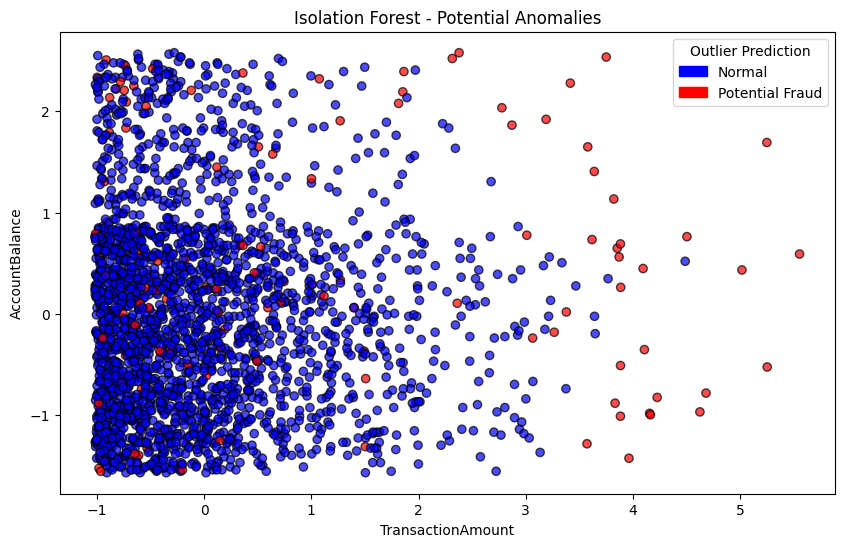

In [10]:
colors = np.where(df['IsAnomaly'] == -1, 'r', 'b')
# Visualize potential frauds (TransactionAmount vs AccountBalance)
plt.figure(figsize=(10, 6))
plt.scatter(x_sc[:, 0], x_sc[:, 1], c=colors, cmap='coolwarm', alpha=0.7,edgecolors='k', label='Data Points')
# Custom legend
import matplotlib.patches as mpatches
normal_patch = mpatches.Patch(color='b', label='Normal')
fraud_patch = mpatches.Patch(color='r', label='Potential Fraud')
plt.legend(handles=[normal_patch, fraud_patch], title='Outlier Prediction')
plt.title('Isolation Forest - Potential Anomalies')
plt.xlabel(features[0]) # TransactionAmount
plt.ylabel(features[2]) # AccountBalance
plt.show()